# Final Project Submission

* Student name: Jonathan Roman
* Student pace: self paced
* Scheduled project review date/time: March 28, 2022, 9AM
* Instructor name: Claude Fried

# Microsoft Movies Needs Analysis

# Overview

This project analyzes the resource needs of an untitled Microsoft movie company, which wants to jump into the original video content space. Information from the datasets came from movie tracking websites. Descriptive analysis is done to figure what movies should the company make to be successful in the box office.

# Business Problem

Microsoft needs to find the best approach to making movies from the scratch to meet their end goal of conquering the box office. That could entail what kind of people to hire, the projected budgets and what kind of movies to make.

# Data Understanding

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import seaborn as sns

# Checking Revelant Data

In [2]:
#loading all the information see what's available
rt_movie_info = pd.read_csv('/Users/Jonathan/Documents/Flatiron/project_1/rt.movie_info.tsv.gz', sep='\t')
rt_reviews = pd.read_csv('/Users/Jonathan/Documents/Flatiron/project_1/rt.reviews.tsv.gz', sep='\t', encoding='latin1')
tmdb_movie_info = pd.read_csv('/Users/Jonathan/Documents/Flatiron/project_1/tmdb.movies.csv.gz')
tn_gross = pd.read_csv('/Users/Jonathan/Documents/Flatiron/project_1/tn.movie_budgets.csv.gz')

After sifting through the other CSVs, The Numbers included information on movie titles, production budgets and gross.

In [3]:
#Using information from this table to get the production budget of movies
tn_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
tn_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The IMDB database contains a lot of information but notably information on movie titles, genres, ratings, and directors.

In [5]:
#using sqlite to open the imdb database to get information on the movie titles, genres, highest rated and directors.

conn = sqlite3.connect('im.db')
q = """
SELECT 
    original_title,
    genres,
    averagerating,
    d.person_id,
    p.primary_name
    
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
JOIN movie_akas
    USING(movie_id)
JOIN directors AS d
    USING(movie_id)
JOIN persons as p
    ON d.person_id = p.person_id
WHERE region = 'US'
AND numvotes > 100

ORDER BY averagerating DESC
;
"""
imdb_db = pd.read_sql(q, conn)

In [6]:
imdb_db.head()

,original_title,genres,averagerating,person_id,primary_name
0,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,nm0000233,Quentin Tarantino
1,Once Upon a Time ... in Hollywood,"Comedy,Drama",9.7,nm0000233,Quentin Tarantino
2,"Hare Krishna! The Mantra, the Movement and the...",Documentary,9.5,nm8145653,John Griesser
3,"Hare Krishna! The Mantra, the Movement and the...",Documentary,9.5,nm8145653,John Griesser
4,"Hare Krishna! The Mantra, the Movement and the...",Documentary,9.5,nm8145653,John Griesser


In [7]:
imdb_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50717 entries, 0 to 50716
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  50717 non-null  object 
 1   genres          50709 non-null  object 
 2   averagerating   50717 non-null  float64
 3   person_id       50717 non-null  object 
 4   primary_name    50717 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.9+ MB


In [8]:
#merging databases to give information needed to give recommendations for genres, budgets and directors based on ratings

df = imdb_db.merge(tn_gross, left_on = "original_title", right_on = "movie")
df

,original_title,genres,averagerating,person_id,primary_name,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Inception,"Action,Adventure,Sci-Fi",8.8,nm0634240,Christopher Nolan,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
1,Inception,"Action,Adventure,Sci-Fi",8.8,nm0634240,Christopher Nolan,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Inception,"Action,Adventure,Sci-Fi",8.8,nm0634240,Christopher Nolan,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
3,Inception,"Action,Adventure,Sci-Fi",8.8,nm0634240,Christopher Nolan,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
4,Interstellar,"Adventure,Drama,Sci-Fi",8.6,nm0634240,Christopher Nolan,32,"Nov 5, 2014",Interstellar,"$165,000,000","$188,017,894","$666,379,375"
...,...,...,...,...,...,...,...,...,...,...,...
11633,Foodfight!,"Action,Animation,Comedy",1.9,nm0440415,Lawrence Kasanoff,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
11634,Foodfight!,"Action,Animation,Comedy",1.9,nm0440415,Lawrence Kasanoff,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
11635,Justin Bieber: Never Say Never,"Documentary,Music",1.6,nm0160840,Jon M. Chu,48,"Feb 11, 2011",Justin Bieber: Never Say Never,"$13,000,000","$73,013,910","$99,034,125"
11636,Justin Bieber: Never Say Never,"Documentary,Music",1.6,nm0160840,Jon M. Chu,48,"Feb 11, 2011",Justin Bieber: Never Say Never,"$13,000,000","$73,013,910","$99,034,125"


# Data Cleaning

In [9]:
#Cleaning duplicates

df.drop_duplicates(inplace=True)
df

,original_title,genres,averagerating,person_id,primary_name,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,Inception,"Action,Adventure,Sci-Fi",8.8,nm0634240,Christopher Nolan,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
4,Interstellar,"Adventure,Drama,Sci-Fi",8.6,nm0634240,Christopher Nolan,32,"Nov 5, 2014",Interstellar,"$165,000,000","$188,017,894","$666,379,375"
12,Samsara,"Documentary,Music",8.5,nm0294825,Ron Fricke,18,"Aug 24, 2012",Samsara,"$4,000,000","$2,672,413","$5,966,671"
14,Whiplash,"Drama,Music",8.5,nm3227090,Damien Chazelle,43,"Oct 10, 2014",Whiplash,"$3,300,000","$13,092,006","$38,969,037"
15,Avengers: Infinity War,"Action,Adventure,Sci-Fi",8.5,nm0751577,Anthony Russo,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
...,...,...,...,...,...,...,...,...,...,...,...
11622,Snow White: A Deadly Summer,Horror,2.2,nm0213983,David DeCoteau,11,"Mar 20, 2012",Snow White: A Deadly Summer,"$1,000,000",$0,$0
11623,Subconscious,"Action,Mystery,Thriller",2.2,nm0385255,Georgia Hilton,78,"Mar 10, 2015",Subconscious,"$500,000",$0,$0
11624,Forsaken,Horror,2.1,nm2691863,Justin Price,54,"Feb 19, 2016",Forsaken,"$18,000,000",$0,$0
11625,Foodfight!,"Action,Animation,Comedy",1.9,nm0440415,Lawrence Kasanoff,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"


In [10]:
#checking for null values in db
df.isna().sum()

original_title       0
genres               0
averagerating        0
person_id            0
primary_name         0
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [11]:
#resetting index to make it more accessible
df.reset_index(inplace=True)

In [12]:
#dropping unnecessary columns
df.drop(['index','release_date', 'movie', 'domestic_gross', 'worldwide_gross', 'id'], axis=1, inplace=True)

In [13]:
#renaming columns for understanding
df.columns = ['Title', 'Genre', 'Rating', 'Person_ID', 'Director_Name', 'Production_Budget']
df

,Title,Genre,Rating,Person_ID,Director_Name,Production_Budget
0,Inception,"Action,Adventure,Sci-Fi",8.8,nm0634240,Christopher Nolan,"$160,000,000"
1,Interstellar,"Adventure,Drama,Sci-Fi",8.6,nm0634240,Christopher Nolan,"$165,000,000"
2,Samsara,"Documentary,Music",8.5,nm0294825,Ron Fricke,"$4,000,000"
3,Whiplash,"Drama,Music",8.5,nm3227090,Damien Chazelle,"$3,300,000"
4,Avengers: Infinity War,"Action,Adventure,Sci-Fi",8.5,nm0751577,Anthony Russo,"$300,000,000"
...,...,...,...,...,...,...
1838,Snow White: A Deadly Summer,Horror,2.2,nm0213983,David DeCoteau,"$1,000,000"
1839,Subconscious,"Action,Mystery,Thriller",2.2,nm0385255,Georgia Hilton,"$500,000"
1840,Forsaken,Horror,2.1,nm2691863,Justin Price,"$18,000,000"
1841,Foodfight!,"Action,Animation,Comedy",1.9,nm0440415,Lawrence Kasanoff,"$45,000,000"


In [14]:
df['Genre'].value_counts()

Adventure,Animation,Comedy    114
Comedy                         81
Drama                          72
Comedy,Drama,Romance           66
Action,Adventure,Sci-Fi        59
                             ... 
Documentary,War                 1
Action,Crime,Fantasy            1
Adventure,Drama,Thriller        1
Action,Documentary              1
Comedy,Mystery,Sci-Fi           1
Name: Genre, Length: 239, dtype: int64

In [15]:
df['Director_Name'].value_counts()

David Gordon Green     8
Steven Spielberg       7
Steven Soderbergh      7
Clint Eastwood         7
Tim Story              7
                      ..
Michael Hoffman Jr.    1
Panos Cosmatos         1
David Koepp            1
Oleg Stepchenko        1
Dan Scanlon            1
Name: Director_Name, Length: 1234, dtype: int64

In [16]:
#Separating genres for analysis
df['Genre']= df['Genre'].str.split(',')
genre_df= df.explode('Genre')

In [17]:
genre_df #Checking cleaned df

,Title,Genre,Rating,Person_ID,Director_Name,Production_Budget
0,Inception,Action,8.8,nm0634240,Christopher Nolan,"$160,000,000"
0,Inception,Adventure,8.8,nm0634240,Christopher Nolan,"$160,000,000"
0,Inception,Sci-Fi,8.8,nm0634240,Christopher Nolan,"$160,000,000"
1,Interstellar,Adventure,8.6,nm0634240,Christopher Nolan,"$165,000,000"
1,Interstellar,Drama,8.6,nm0634240,Christopher Nolan,"$165,000,000"
...,...,...,...,...,...,...
1841,Foodfight!,Action,1.9,nm0440415,Lawrence Kasanoff,"$45,000,000"
1841,Foodfight!,Animation,1.9,nm0440415,Lawrence Kasanoff,"$45,000,000"
1841,Foodfight!,Comedy,1.9,nm0440415,Lawrence Kasanoff,"$45,000,000"
1842,Justin Bieber: Never Say Never,Documentary,1.6,nm0160840,Jon M. Chu,"$13,000,000"


In [18]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4605 entries, 0 to 1842
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              4605 non-null   object 
 1   Genre              4605 non-null   object 
 2   Rating             4605 non-null   float64
 3   Person_ID          4605 non-null   object 
 4   Director_Name      4605 non-null   object 
 5   Production_Budget  4605 non-null   object 
dtypes: float64(1), object(5)
memory usage: 251.8+ KB


In [19]:
#Changing Production Budget to a float for analysis
genre_df['Production_Budget'] = genre_df['Production_Budget'].str.replace('$', '').str.replace(',', '').astype('int64')
genre_df

,Title,Genre,Rating,Person_ID,Director_Name,Production_Budget
0,Inception,Action,8.8,nm0634240,Christopher Nolan,160000000
0,Inception,Adventure,8.8,nm0634240,Christopher Nolan,160000000
0,Inception,Sci-Fi,8.8,nm0634240,Christopher Nolan,160000000
1,Interstellar,Adventure,8.6,nm0634240,Christopher Nolan,165000000
1,Interstellar,Drama,8.6,nm0634240,Christopher Nolan,165000000
...,...,...,...,...,...,...
1841,Foodfight!,Action,1.9,nm0440415,Lawrence Kasanoff,45000000
1841,Foodfight!,Animation,1.9,nm0440415,Lawrence Kasanoff,45000000
1841,Foodfight!,Comedy,1.9,nm0440415,Lawrence Kasanoff,45000000
1842,Justin Bieber: Never Say Never,Documentary,1.6,nm0160840,Jon M. Chu,13000000


# Analysis

In [20]:
#First Step is to check for the most popular genre based on ratings
ratings_by_genre = genre_df[['Genre','Rating']]
ratings_by_genre = ratings_by_genre.groupby('Genre').mean() #Calculating the mean per genre
ratings_by_genre



,Rating
Genre,
Action,6.198354
Adventure,6.458691
Animation,6.604938
Biography,7.002941
Comedy,6.159906
Crime,6.263968
Documentary,6.840000
Drama,6.424880
Family,6.222430


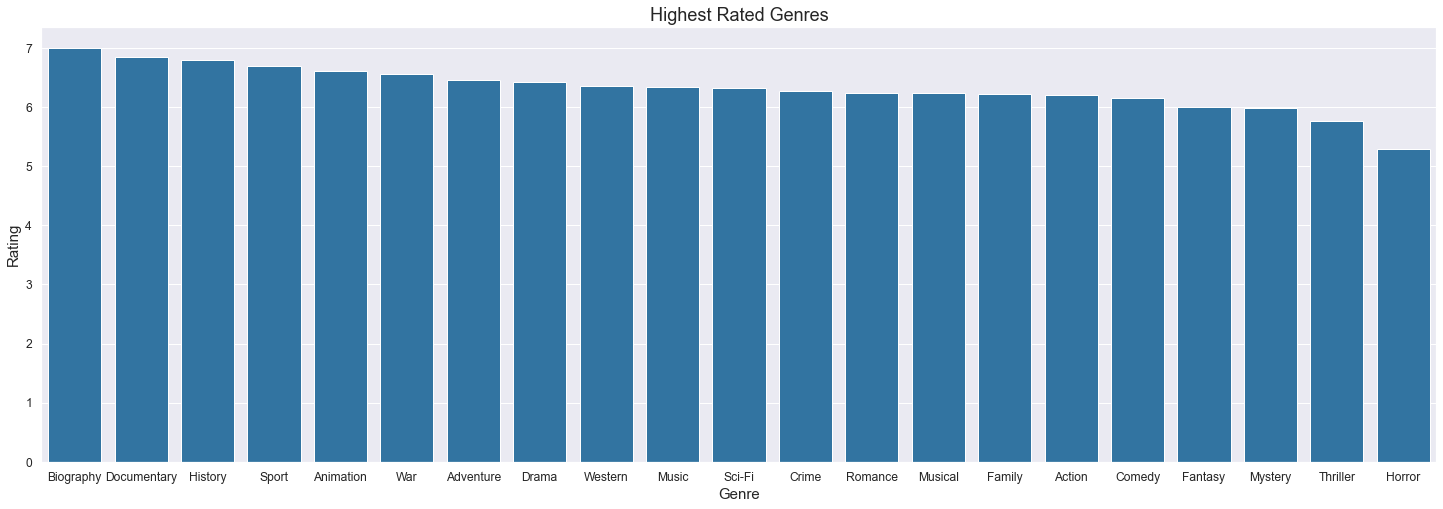

In [21]:
plt.figure(figsize=(25, 8)) #sizing the barplot
sns.set(font_scale=1.1) #setting fonts for tickers

sns.barplot(x = 'Genre', #setting x-axis
            y = 'Rating', #setting y-axis
            data = ratings_by_genre.reset_index(), #choosing dataset to plot
            order=ratings_by_genre.reset_index().sort_values('Rating', ascending=False).Genre,
            color='tab:blue'); #Sorting by highest rated

plt.xlabel("Genre", size=15) #setting x-axis label and size
plt.ylabel("Rating", size=15) #setting y-axis label and size
plt.title("Highest Rated Genres", size=18); #setting title and size

In [22]:
#Second is to find the top rated director by genre

#pulling info on directors, genres and ratings
director_ratings_per_genre = genre_df[['Director_Name','Genre','Rating']] 

#grouping by director name and genre to get the averqge for each genre per director
director_ratings_per_genre = director_ratings_per_genre.groupby(['Director_Name', 'Genre']).mean() 

#checking information
director_ratings_per_genre








Rating
Director_Name   Genre            
A.R. Murugadoss Action        5.9
                Thriller      5.9
Aaron Hann      Drama         6.0
                Mystery       6.0
                Sci-Fi        6.0
...                           ...
Zoran Lisinac   Music         6.8
                Romance       6.8
Éric Warin      Adventure     6.8
                Animation     6.8
                Comedy        6.8

[3646 rows x 1 columns]

In [23]:
#resetting index to make it easier to work with
director_df = director_ratings_per_genre.reset_index() 

#creating a loop to grab the top rated director by genre
df_lst = [] 

for genre in director_df['Genre'].unique():
    df_lst.append(director_df[director_df['Genre'] == genre].sort_values('Rating', ascending=False).head(1)) #Looping through

#checking to see if it matches the number of genres
len(df_lst) 

21

In [24]:
#appending the info to make a new variable
top_directors = pd.concat(df_lst) 

#ordering the information by rating
top_directors.sort_values('Rating', ascending=False, inplace=True) 

#checking information
top_directors

,Director_Name,Genre,Rating
655,Christopher Nolan,Adventure,8.7
658,Christopher Nolan,Sci-Fi,8.7
2589,Nitesh Tiwari,Action,8.5
2978,Ron Fricke,Music,8.5
2977,Ron Fricke,Documentary,8.5
2590,Nitesh Tiwari,Biography,8.5
2591,Nitesh Tiwari,Drama,8.5
39,Adrian Molina,Comedy,8.4
2258,Marius A. Markevicius,Sport,8.4
659,Christopher Nolan,Thriller,8.4


In [25]:
#checking index
top_directors['Director_Name'][655] 

'Christopher Nolan'

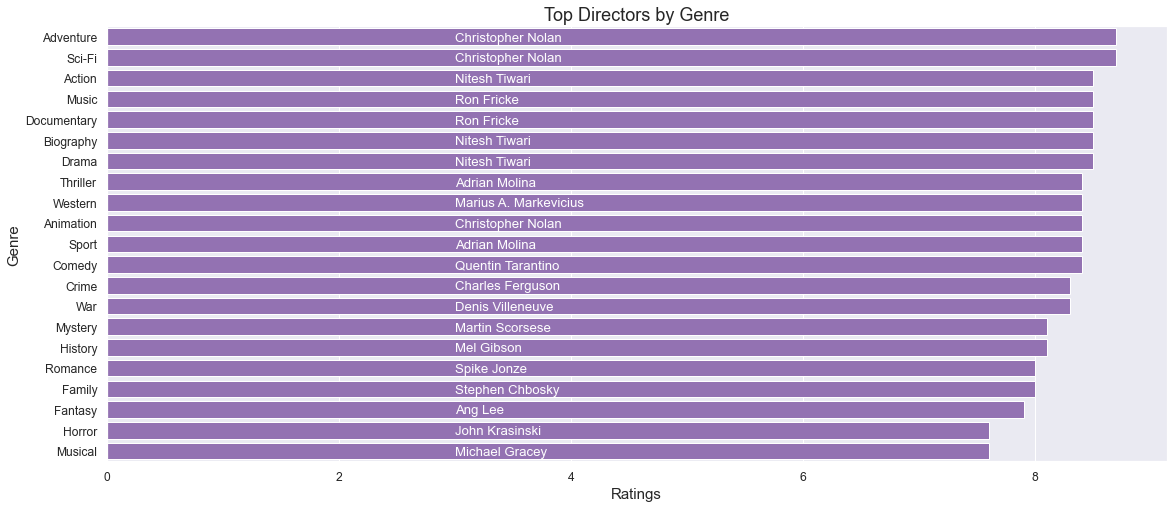

In [26]:
plt.figure(figsize=(19, 8)) #sizing the barplot
sns.set(font_scale=1.1) #setting fonts for tickers

sns.barplot(x = 'Rating', #setting x-axis
            y = 'Genre', #y-axis
            data = top_directors, #choosing dataset to plot
            order=top_directors.sort_values('Rating', ascending=False).Genre,
            color='tab:purple') #Sorting by highest average budget

plt.xlabel("Ratings", size=15) #setting x-axis label and size
plt.ylabel("Genre", size=15) #setting y-axis label and size
plt.title("Top Directors by Genre", size=18) #setting title and size

#annotating the directors to show the directors per genre
plt.annotate(top_directors['Director_Name'][655], xy= (3,0.2), color='white')
plt.annotate(top_directors['Director_Name'][655], xy= (3,1.2), color='white')
plt.annotate(top_directors['Director_Name'][2589], xy= (3,2.2), color='white')
plt.annotate(top_directors['Director_Name'][2978], xy= (3,3.2), color='white')
plt.annotate(top_directors['Director_Name'][2977], xy= (3,4.2), color='white')
plt.annotate(top_directors['Director_Name'][2590], xy= (3,5.2), color='white')
plt.annotate(top_directors['Director_Name'][2591], xy= (3,6.2), color='white')
plt.annotate(top_directors['Director_Name'][39], xy= (3,7.2), color='white')
plt.annotate(top_directors['Director_Name'][2258], xy= (3,8.2), color='white')
plt.annotate(top_directors['Director_Name'][659], xy= (3,9.2), color='white')
plt.annotate(top_directors['Director_Name'][38], xy= (3,10.2), color='white')
plt.annotate(top_directors['Director_Name'][2782], xy= (3,11.2), color='white')
plt.annotate(top_directors['Director_Name'][542], xy= (3,12.2), color='white')
plt.annotate(top_directors['Director_Name'][963], xy= (3,13.2), color='white')
plt.annotate(top_directors['Director_Name'][2290], xy= (3,14.2), color='white')
plt.annotate(top_directors['Director_Name'][2343], xy= (3,15.2), color='white')
plt.annotate(top_directors['Director_Name'][3188], xy= (3,16.2), color='white')
plt.annotate(top_directors['Director_Name'][3214], xy= (3,17.2), color='white')
plt.annotate(top_directors['Director_Name'][181], xy= (3,18.2), color='white')
plt.annotate(top_directors['Director_Name'][1729], xy= (3,19.2), color='white')
plt.annotate(top_directors['Director_Name'][2381], xy= (3,20.2), color='white'); 



In [27]:
#Third is to find the average budget per genre

#Setting float format to display total budgets
pd.set_option('display.float_format', lambda x: '%0.2f' % x)

#Choosing dataset to plot
budget_per_genre = genre_df[['Genre', 'Production_Budget']] 

#calculating the average budget per genre
budget_per_genre = budget_per_genre.groupby('Genre').mean().reset_index()

#checking information
budget_per_genre 


,Genre,Production_Budget
0,Action,78471512.35
1,Adventure,101874708.80
2,Animation,94404320.99
3,Biography,26620808.82
4,Comedy,41899831.78
5,Crime,31179862.35
6,Documentary,8257892.31
7,Drama,25817484.06
8,Family,65815887.85
9,Fantasy,79805944.06


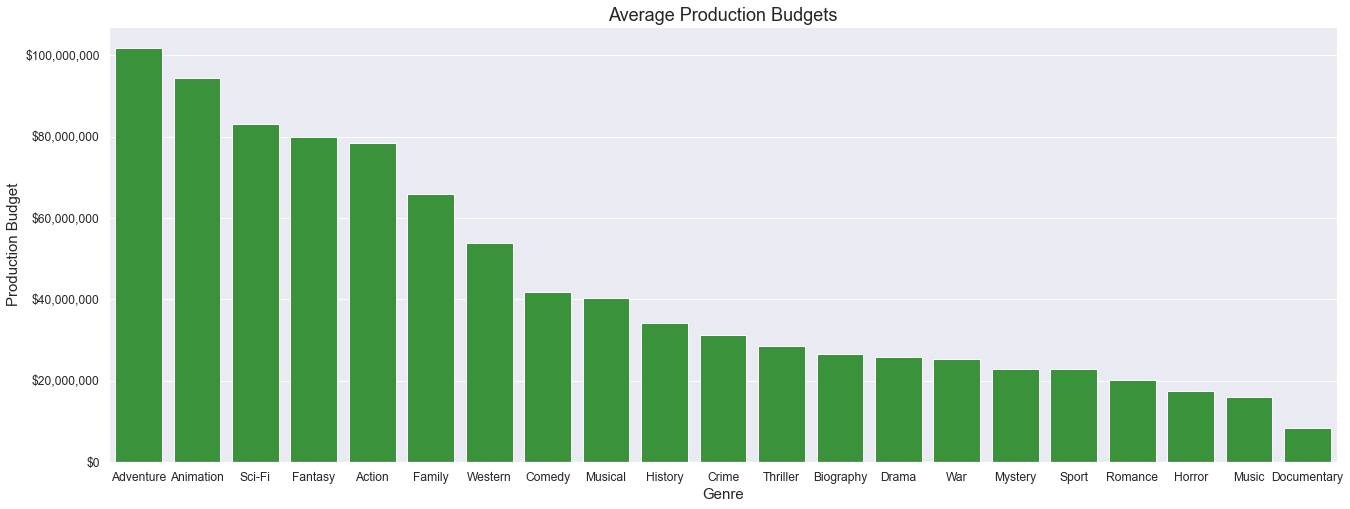

In [28]:
plt.figure(figsize=(22, 8)) #sizing the barplot
sns.set(font_scale=1.1) #setting fonts for tickers

sns.barplot(x = 'Genre', #setting x-axis
            y = 'Production_Budget', #setting y-axis
            data = budget_per_genre, #choosing dataset to plot
            order=budget_per_genre.sort_values('Production_Budget', ascending=False).Genre,
            color='tab:green') #Sorting by highest average budget

plt.xlabel("Genre", size=15) #setting x-axis label and size
plt.ylabel("Production Budget", size=15) #setting y-axis label and size
plt.title("Average Production Budgets", size=18); #setting title and size

import matplotlib.ticker as mtick #importing ticker to customize tickers
fmt = '${x:,.0f}' #setting the format to $
tick = mtick.StrMethodFormatter(fmt) #appending it to a formatter
plt.gca().yaxis.set_major_formatter(tick) #applying the format

# Conclusions

This analysis leads to three recommendations for the movies that should be created for Microsoft to do well in the original
content space:

- <b>Start with creating movies with the highest rated movie genres</b>. If they start with the top 5 highest rated genres, it would be: Biography, Documentary, History, Sport, and Animation. This may allow consumers of movies to be attracted to the quality of content that the studio produces. It also could lead to critically acclaimed movies that would be featured on prominent movie media outlets as recommendations to watch.

- <b>Choose the highest rated directors per genre.</b> While there are a lot of different directors, some directors specialize in a particular genre. It could affect the movie quality if a director who is highly skilled in producing a horror genre movie directing an animation style movie.

- <b>The highest budget does not always mean higher rated movies.</b> It is better to know how much budget a particular genre spends as to not overexceed budgets too greatly or undercut budgets too harshly. It would be better for the studio to have an estimate to a particular budget and work around that budget accordingly. 

# Next Steps

Further analyses could yield additional insights to growth:
- <b>Better budget projections.</b> This modeling could find the optimal budgets for movie making to maintain consistency in quality.
- <b>Specified combinations in genres.</b> Movies can have multiple genres associated to them so this modeling can explore a combination of genres that might be of interest to the company.
- <b>Budget and ratings.</b> This modeling could be used to make budget/ratings ratio to try to maximize the highest ratings to the lowest average budget.